## Import Libraries

In [18]:
import warnings

import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import FactorAnalysis

## 1. Linear Discriminant Analysis (LDA)

In [2]:
unsw = pd.read_csv('UNSW_NB15_testing-set.csv', na_values = '?')

### Basic Data Exploration

In [3]:
unsw.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
unsw.shape

(175341, 45)

In [5]:
unsw.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [6]:
print(unsw.dtypes)

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

### Data Wrangling

In [7]:
unsw.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
unsw_copy = unsw.drop(['id', 'proto', 'service', 'state', 'attack_cat', 'label'], axis = 1)

In [9]:
print(unsw_copy.dtypes)

dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_ftp_cmd    

### Model Fitting

In [10]:
lda = LinearDiscriminantAnalysis(n_components = 3)
lda.fit(unsw_copy, unsw['attack_cat'])

LinearDiscriminantAnalysis(n_components=3)

### Transformation

In [11]:
unsw_LDA = lda.transform(unsw_copy)
unsw_LDA_df = pd.DataFrame(data = unsw_LDA, columns = ["D 1", "D 2", "D 3"])
unsw_LDA_df['attack_cat'] = unsw['attack_cat']
unsw_LDA_df.head()

,D 1,D 2,D 3,attack_cat
0,-1.430563,-1.116777,-1.588165,Normal
1,-0.434394,-0.093352,-1.173736,Normal
2,-0.929682,-0.749488,1.810995,Normal
3,-1.192542,-1.376579,2.592348,Normal
4,1.304979,1.245671,-2.419357,Normal


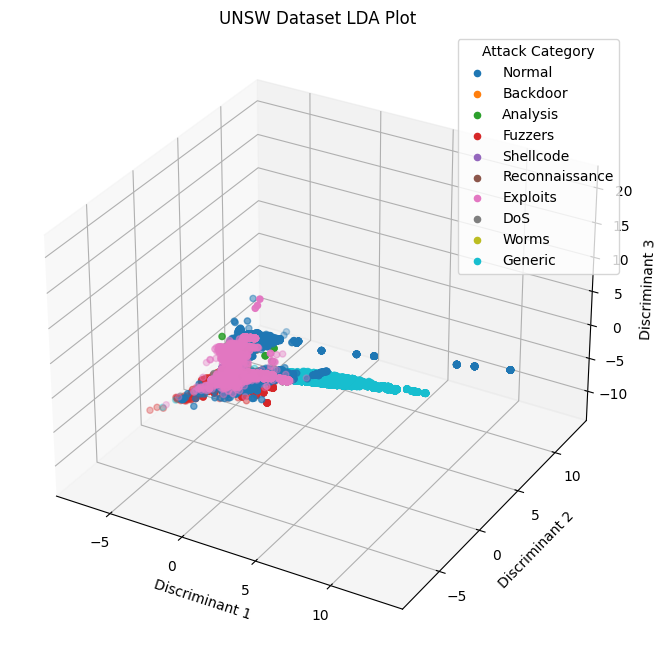

In [12]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

unique_cats = unsw_LDA_df['attack_cat'].unique()
colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(unique_cats)))
color_dict = dict(zip(unique_cats, colors))

for cat in unique_cats:
    df_subset = unsw_LDA_df[unsw_LDA_df['attack_cat'] == cat]
    ax.scatter(df_subset['D 1'], df_subset['D 2'], df_subset['D 3'], color = color_dict[cat], label = cat)

ax.set_xlabel("Discriminant 1")
ax.set_ylabel("Discriminant 2")
ax.set_zlabel("Discriminant 3")

plt.legend(title = "Attack Category")
plt.title("UNSW Dataset LDA Plot")

plt.show()

## 2. Support Vector Machines (SVM)

### Split the data into a training set and a test/validation set.

In [13]:
le = LabelEncoder()

In [14]:
X = unsw_copy
y = le.fit_transform(unsw['attack_cat'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardization

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Fitting

In [19]:
# Defining the XGBoost model
xgb_model = XGBClassifier(eval_metric = 'mlogloss')

# Training the XGBoost model with verbose output
xgb_model.fit(X_train, y_train, verbose = True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

### Model Predictions

In [20]:
unsw_copy_predictions = xgb_model.predict(X_test)

### Model Output

In [21]:
unsw_cm = metrics.confusion_matrix(y_test, unsw_copy_predictions)

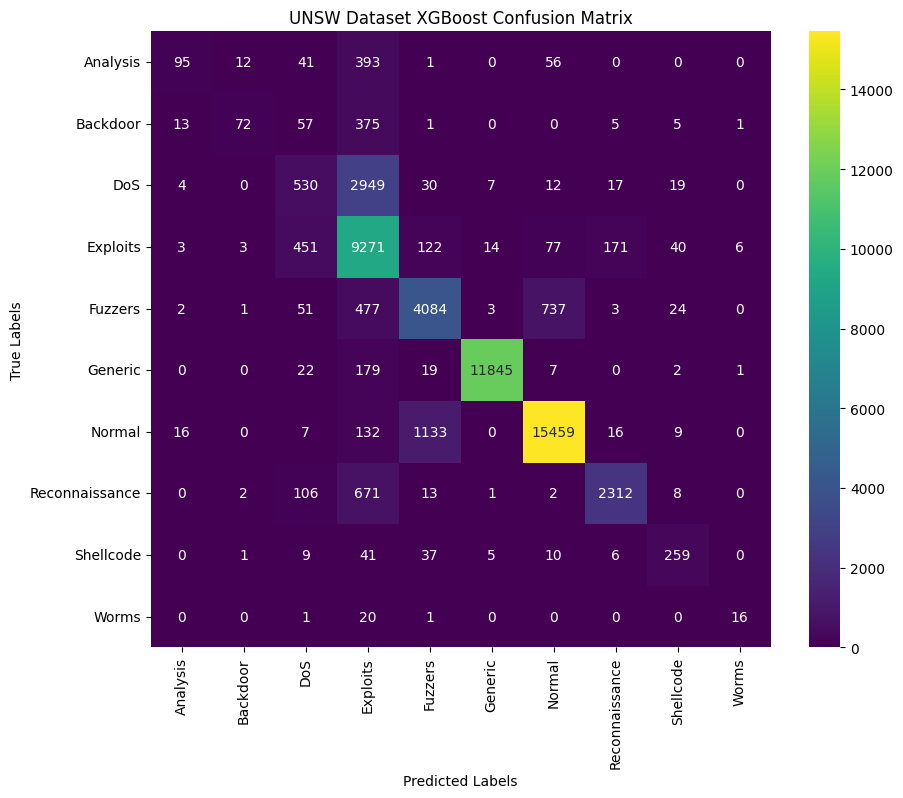

In [22]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(unsw_cm, cmap = 'viridis', annot = True, fmt = ".0f", ax = ax)

ax.xaxis.set_ticklabels(le.classes_)
ax.yaxis.set_ticklabels(le.classes_)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

ax.set_title("UNSW Dataset XGBoost Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()

In [23]:
print(classification_report(y_test, unsw_copy_predictions))

              precision    recall  f1-score   support

           0       0.71      0.16      0.26       598
           1       0.79      0.14      0.23       529
           2       0.42      0.15      0.22      3568
           3       0.64      0.91      0.75     10158
           4       0.75      0.76      0.75      5382
           5       1.00      0.98      0.99     12075
           6       0.94      0.92      0.93     16772
           7       0.91      0.74      0.82      3115
           8       0.71      0.70      0.71       368
           9       0.67      0.42      0.52        38

    accuracy                           0.84     52603
   macro avg       0.75      0.59      0.62     52603
weighted avg       0.83      0.84      0.82     52603



## 3. Factor Analysis (FA)

### Standardization

In [24]:
FA_scaler = StandardScaler()
X_new = scaler.fit_transform(unsw_copy)

### Covariance Matrix

In [25]:
cov = pd.DataFrame(X_new).cov()
cov

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.000006,0.254561,0.181183,0.199732,0.144135,-0.120967,0.012196,0.044159,-0.081750,-0.050603,...,-0.086301,-0.094091,-0.093924,-0.101760,0.020641,0.020641,0.024743,-0.080872,-0.115337,0.035370
1,0.254561,1.000006,0.390070,0.963796,0.206610,-0.076359,-0.102723,0.068247,-0.051646,0.075898,...,-0.060195,-0.068373,-0.072484,-0.077554,0.009951,0.009951,0.006084,-0.061585,-0.069599,-0.017770
2,0.181183,0.390070,1.000006,0.188477,0.971913,-0.098202,-0.192581,0.053861,-0.066710,0.139146,...,-0.071909,-0.086695,-0.094267,-0.094085,0.013491,0.013491,0.047975,-0.075190,-0.078342,-0.021765
3,0.199732,0.963796,0.188477,1.000006,0.009926,-0.028468,-0.020860,0.063009,-0.018323,-0.007829,...,-0.026661,-0.026490,-0.027282,-0.032061,-0.004515,-0.004515,-0.002185,-0.027479,-0.034553,-0.006367
4,0.144135,0.206610,0.971913,0.009926,1.000006,-0.059475,-0.135516,0.023559,-0.040430,0.104758,...,-0.042633,-0.052135,-0.056901,-0.054634,-0.010461,-0.010461,0.051403,-0.045594,-0.044531,-0.013147
5,-0.120967,-0.076359,-0.098202,-0.028468,-0.059475,1.000006,0.407574,-0.414548,0.602495,-0.153052,...,0.317231,0.353591,0.390724,0.383096,-0.068140,-0.068140,-0.109298,0.310878,0.362885,-0.072949
6,0.012196,-0.102723,-0.192581,-0.020860,-0.135516,0.407574,1.000006,-0.032824,0.276477,-0.397433,...,0.271385,0.344106,0.379932,0.404348,-0.124158,-0.124158,-0.112833,0.273254,0.340680,-0.220430
7,0.044159,0.068247,0.053861,0.063009,0.023559,-0.414548,-0.032824,1.000006,-0.280429,-0.116421,...,-0.381680,-0.366310,-0.389431,-0.403468,0.107209,0.107209,0.223653,-0.365406,-0.431191,-0.091138
8,-0.081750,-0.051646,-0.066710,-0.018323,-0.040430,0.602495,0.276477,-0.280429,1.000006,-0.106294,...,0.076471,0.100118,0.082463,0.155031,-0.046195,-0.046195,-0.073921,0.084413,0.141169,-0.049328
9,-0.050603,0.075898,0.139146,-0.007829,0.104758,-0.153052,-0.397433,-0.116421,-0.106294,1.000006,...,-0.100954,-0.143574,-0.153430,-0.161193,-0.027810,-0.027810,-0.039246,-0.098149,-0.087248,-0.035069


In [26]:
transformer = FactorAnalysis(n_components = 10, random_state = 42)

In [27]:
X_transformed = transformer.fit_transform(X_new)

In [28]:
X_transformed.shape

(175341, 10)

In [29]:
eigenValues, eigenVectors = np.linalg.eig(cov)

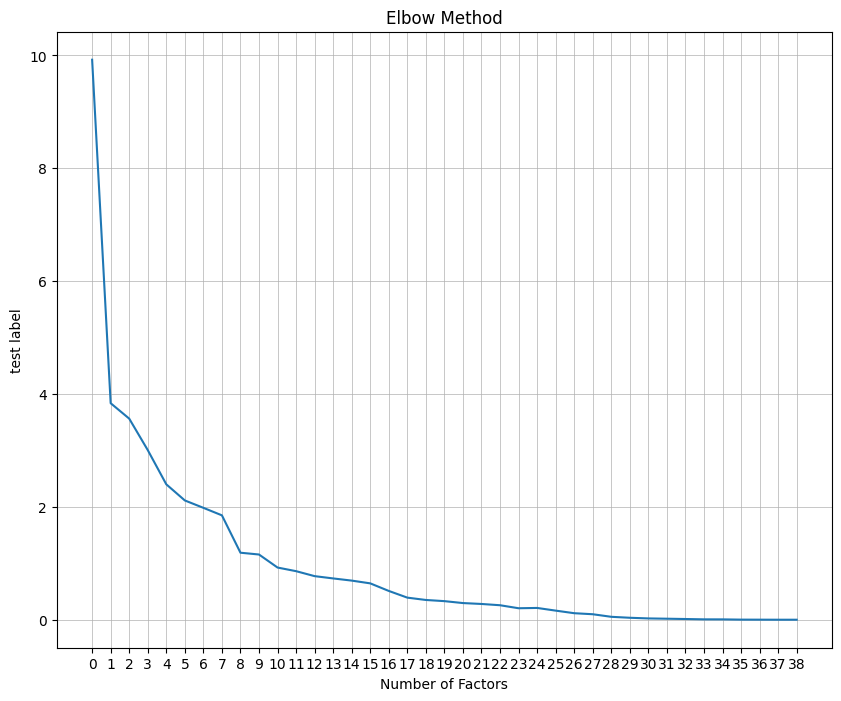

In [30]:
plt.figure(figsize = (10, 8))
plt.plot(range(len(cov.columns)), eigenValues)
plt.grid(linewidth = 0.5)
plt.xticks(range(len(cov.columns)))
plt.title("Elbow Method")
plt.xlabel("Number of Factors")
plt.ylabel("test label")
plt.show()

In [33]:
print("Factor 1 accounts for", (eigenValues[0]/eigenValues.sum()) * 100, "% of the total variance.")

Factor 1 accounts for 25.44661665089788 % of the total variance.


In [78]:
fa_test = pd.DataFrame(eigenVectors[:,0:10].T , columns=unsw_copy.columns)
fa_test[fa_test>0.05].T.sort_values(by=0, ascending=False)

,0,1,2,3,4,5,6,7,8,9
ct_dst_src_ltm,0.262512,0.080063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ct_srv_dst,0.258540,0.099138,NaN,0.070408,0.080066,NaN,NaN,NaN,NaN,0.060534
ct_srv_src,0.255617,0.097674,NaN,0.070460,0.079060,NaN,NaN,NaN,NaN,0.066366
ct_dst_sport_ltm,0.253897,0.077929,NaN,0.050538,NaN,0.056098,NaN,0.053830,NaN,NaN
ct_src_dport_ltm,0.253373,0.091971,NaN,0.065883,0.073316,0.061826,NaN,0.062723,NaN,NaN
ct_dst_ltm,0.244517,0.107425,NaN,0.082312,0.106632,0.065183,NaN,0.052146,NaN,NaN
ct_src_ltm,0.233700,0.097680,NaN,0.076420,0.098379,0.053612,NaN,NaN,NaN,NaN
rate,0.184421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282289,0.262044
ct_state_ttl,0.182417,NaN,NaN,NaN,NaN,NaN,NaN,0.066794,NaN,NaN
sttl,0.151938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


FA 0: Average Packet size, frequency of outbound traffic
FA 1: Increase in dropped traffic, large outbound packets. Likely exfil.
FA 2: Likely fuzzing
FA 3: Similar to FA 1 but with TCP
FA 4: Similar to FA 1 but with FTP